# Assignment No. 02

# Problem Statement :: Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly.


Handling Null Values

In [2]:
import pandas as pd #importing pandas
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
df = pd.read_csv("C:/Users/91862/Desktop/DATASCIENCECODES//student.csv") #reading the dataset file
df

,Roll No,Name,Gender,Sem1,Sem2,Sem3,Sem4,average Score
0,1,Aditya,M,75.0,10.0,78.0,95.0,64.500000
1,2,Priti,F,78.0,76.0,78.0,76.0,77.000000
2,3,Arjun,M,7.0,95.0,98.0,90.0,72.500000
3,4,Bheem,M,88.0,68.0,78.0,80.0,78.500000
4,5,Raju,M,25.0,69.0,NaN,70.0,41.000000
5,6,Gaurav,M,88.0,67.0,98.0,87.0,85.000000
6,7,Gayatri,F,71.0,NaN,9.0,49.0,43.000000
7,8,Swar,M,15.0,48.0,87.0,68.0,54.500000
8,9,Rupesh,M,35.0,57.0,78.0,59.0,57.250000
9,10,Nisha,F,459.0,59.0,45.0,79.0,160.500000


In [3]:
#Checking the total count of rows of columns having null values
df.isnull().sum()

Roll No          0
Name             0
Gender           0
Sem1             2
Sem2             2
Sem3             2
Sem4             3
average Score    0
dtype: int64

In [4]:
#displaying the rows with null values
df[df.isnull().any(axis=1)]

,Roll No,Name,Gender,Sem1,Sem2,Sem3,Sem4,average Score
4,5,Raju,M,25.0,69.0,NaN,70.0,41.000000
6,7,Gayatri,F,71.0,NaN,9.0,49.0,43.000000
11,12,Kavya,F,65.0,64.0,86.0,NaN,71.666667
13,14,Ashwini,F,NaN,61.0,48.0,23.0,44.000000
16,17,Tina,F,51.0,84.0,84.0,NaN,73.000000
17,18,Ganesh,M,26.0,87.0,NaN,42.0,51.666667
22,23,Niraj,M,45.0,84.0,38.0,NaN,55.666667
24,25,Rudra,M,NaN,56.0,68.0,586.0,236.666667
29,30,Chintu,M,24.0,NaN,65.0,45.0,44.666667


In [5]:
df.dtypes

Roll No            int64
Name              object
Gender            object
Sem1             float64
Sem2             float64
Sem3             float64
Sem4             float64
average Score    float64
dtype: object

In [6]:
df['Sem1'] = df['Sem1'].astype('float64')

In [7]:
df.dtypes

Roll No            int64
Name              object
Gender            object
Sem1             float64
Sem2             float64
Sem3             float64
Sem4             float64
average Score    float64
dtype: object

Missing value treatement

In [8]:
#categorical & ordinal - computation is mode
#numerical - computation is mean or median
sem1_mode = df['Sem1'].mode()[0] 
df['Sem1'].fillna(sem1_mode, inplace=True)
sem2_mode = df['Sem2'].mode()[0] 
df['Sem2'].fillna(sem2_mode, inplace=True)
sem3_mode = df['Sem3'].mode()[0] 
df['Sem3'].fillna(sem3_mode, inplace=True)
sem4_mode = df['Sem4'].mode()[0] 
df['Sem4'].fillna(sem4_mode, inplace=True)
print(df)

    Roll No      Name Gender   Sem1   Sem2   Sem3   Sem4  average Score
0         1    Aditya      M   75.0   10.0   78.0   95.0      64.500000
1         2     Priti      F   78.0   76.0   78.0   76.0      77.000000
2         3     Arjun      M    7.0   95.0   98.0   90.0      72.500000
3         4     Bheem      M   88.0   68.0   78.0   80.0      78.500000
4         5      Raju      M   25.0   69.0   78.0   70.0      41.000000
5         6    Gaurav      M   88.0   67.0   98.0   87.0      85.000000
6         7   Gayatri      F   71.0   75.0    9.0   49.0      43.000000
7         8      Swar      M   15.0   48.0   87.0   68.0      54.500000
8         9    Rupesh      M   35.0   57.0   78.0   59.0      57.250000
9        10     Nisha      F  459.0   59.0   45.0   79.0     160.500000
10       11     Rucha      F   87.0  356.0   90.0   58.0     147.750000
11       12     Kavya      F   65.0   64.0   86.0   84.0      71.666667
12       13     Priya      F   73.0   63.0   87.0   69.0      73

In [9]:
df.isnull().sum()

Roll No          0
Name             0
Gender           0
Sem1             0
Sem2             0
Sem3             0
Sem4             0
average Score    0
dtype: int64

Alternate methods for missing value treatements

In [10]:
#Filling the null values with 0
'''
df['Sem1'] = df['Sem1'].fillna(0)
df['Sem2'] = df['Sem2'].fillna(0)
df['Sem3'] = df['Sem3'].fillna(0)
df['Sem4'] = df['Sem4'].fillna(0)
df
'''

"\ndf['Sem1'] = df['Sem1'].fillna(0)\ndf['Sem2'] = df['Sem2'].fillna(0)\ndf['Sem3'] = df['Sem3'].fillna(0)\ndf['Sem4'] = df['Sem4'].fillna(0)\ndf\n"

In [11]:
#Filling the null values with "Missing" word
'''
df['Sem1'] = df['Sem1'].fillna("missing")
df['Sem2'] = df['Sem2'].fillna("missing")
df['Sem3'] = df['Sem3'].fillna("missing")
df['Sem4'] = df['Sem4'].fillna("missing")
df
'''

'\ndf[\'Sem1\'] = df[\'Sem1\'].fillna("missing")\ndf[\'Sem2\'] = df[\'Sem2\'].fillna("missing")\ndf[\'Sem3\'] = df[\'Sem3\'].fillna("missing")\ndf[\'Sem4\'] = df[\'Sem4\'].fillna("missing")\ndf\n'

In [12]:
#Droping the rows with null values
'''
df.dropna()
'''

'\ndf.dropna()\n'

Detecting Outliers

In [13]:
#Summary Statistics
print(df.describe())

         Roll No        Sem1        Sem2        Sem3        Sem4  \
count  30.000000   30.000000   30.000000   30.000000   30.000000   
mean   15.500000   68.700000   76.133333   78.266667   77.966667   
std     8.803408   78.484855   57.272930   81.276002   99.905985   
min     1.000000    3.000000   10.000000   -8.000000    2.000000   
25%     8.250000   39.750000   59.500000   51.000000   45.250000   
50%    15.500000   52.500000   72.000000   76.500000   69.500000   
75%    22.750000   78.000000   84.000000   84.000000   84.000000   
max    30.000000  459.000000  356.000000  485.000000  586.000000   

       average Score  
count      30.000000  
mean       75.119445  
std        45.505424  
min        20.500000  
25%        52.125000  
50%        59.875000  
75%        76.000000  
max       236.666667  


In [14]:
'''
Summary statistics for a specific column (e.g., 'Sem1')
print(df['Sem1'].describe())
'''

"\nSummary statistics for a specific column (e.g., 'Sem1')\nprint(df['Sem1'].describe())\n"

In [15]:
#Detect outliers using IQR

threshold = 1.5

def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

outliers_sem1_iqr = detect_outliers_iqr(df['Sem1'])
print("Outliers detected using IQR for Sem1:")
if not outliers_sem1_iqr.empty:
    print(outliers_sem1_iqr)
else:
    print("No outliers found in Sem1 column.")

outliers_sem2_iqr = detect_outliers_iqr(df['Sem2'])
print("\nOutliers detected using IQR for Sem2:")
if not outliers_sem2_iqr.empty:
    print(outliers_sem2_iqr)
else:
    print("No outliers found in Sem2 column.")

outliers_sem3_iqr = detect_outliers_iqr(df['Sem3'])
print("\nOutliers detected using IQR for Sem3:")
if not outliers_sem3_iqr.empty:
    print(outliers_sem3_iqr)
else:
    print("No outliers found in Sem3 column.")

outliers_sem4_iqr = detect_outliers_iqr(df['Sem4'])
print("\nOutliers detected using IQR for Sem4:")
if not outliers_sem4_iqr.empty:
    print(outliers_sem4_iqr)
else:
    print("No outliers found in Sem4 column.")

Outliers detected using IQR for Sem1:
9    459.0
Name: Sem1, dtype: float64

Outliers detected using IQR for Sem2:
0      10.0
10    356.0
25     21.0
26     19.0
Name: Sem2, dtype: float64

Outliers detected using IQR for Sem3:
14     -8.0
28    485.0
Name: Sem3, dtype: float64

Outliers detected using IQR for Sem4:
24    586.0
Name: Sem4, dtype: float64


Alternate method to detect outliers

In [16]:
#Detecting outliers using Z-Score
'''
threshold = 3

z_scores_sem1 = (df['Sem1'] - df['Sem1'].mean()) / df['Sem1'].std()
outliers_sem1 = df[(z_scores_sem1 > threshold) | (z_scores_sem1 < -threshold)]
print("Outliers detected using z-score for Sem1:")
if not outliers_sem1.empty:
    print(outliers_sem1)
else:
    print("No outliers found in Sem1 column.")

z_scores_sem2 = (df['Sem2'] - df['Sem2'].mean()) / df['Sem2'].std()
outliers_sem2 = df[(z_scores_sem2 > threshold) | (z_scores_sem2 < -threshold)]
print("Outliers detected using z-score for Sem2:")
if not outliers_sem2.empty:
    print(outliers_sem2)
else:
    print("No outliers found in Sem1 column.")
    
z_scores_sem3 = (df['Sem3'] - df['Sem3'].mean()) / df['Sem3'].std()
outliers_sem3 = df[(z_scores_sem3 > threshold) | (z_scores_sem3 < -threshold)]
print("Outliers detected using z-score for Sem3:")
if not outliers_sem3.empty:
    print(outliers_sem3)
else:
    print("No outliers found in Sem1 column.")
    
z_scores_sem4 = (df['Sem4'] - df['Sem4'].mean()) / df['Sem4'].std()
outliers_sem4 = df[(z_scores_sem4 > threshold) | (z_scores_sem4 < -threshold)]
print("Outliers detected using z-score for Sem4:")
if not outliers_sem4.empty:
    print(outliers_sem4)
else:
    print("No outliers found in Sem1 column.")    
'''    

'\nthreshold = 3\n\nz_scores_sem1 = (df[\'Sem1\'] - df[\'Sem1\'].mean()) / df[\'Sem1\'].std()\noutliers_sem1 = df[(z_scores_sem1 > threshold) | (z_scores_sem1 < -threshold)]\nprint("Outliers detected using z-score for Sem1:")\nif not outliers_sem1.empty:\n    print(outliers_sem1)\nelse:\n    print("No outliers found in Sem1 column.")\n\nz_scores_sem2 = (df[\'Sem2\'] - df[\'Sem2\'].mean()) / df[\'Sem2\'].std()\noutliers_sem2 = df[(z_scores_sem2 > threshold) | (z_scores_sem2 < -threshold)]\nprint("Outliers detected using z-score for Sem2:")\nif not outliers_sem2.empty:\n    print(outliers_sem2)\nelse:\n    print("No outliers found in Sem1 column.")\n    \nz_scores_sem3 = (df[\'Sem3\'] - df[\'Sem3\'].mean()) / df[\'Sem3\'].std()\noutliers_sem3 = df[(z_scores_sem3 > threshold) | (z_scores_sem3 < -threshold)]\nprint("Outliers detected using z-score for Sem3:")\nif not outliers_sem3.empty:\n    print(outliers_sem3)\nelse:\n    print("No outliers found in Sem1 column.")\n    \nz_scores_sem4 =

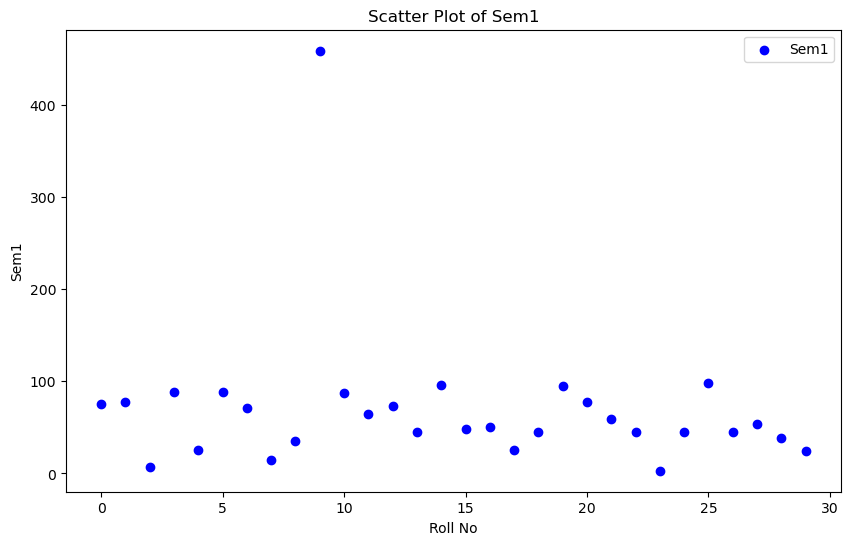

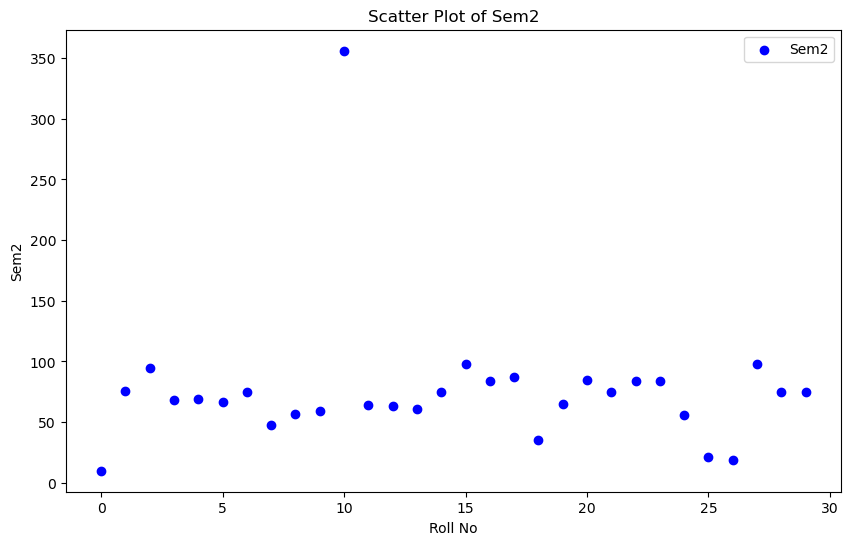

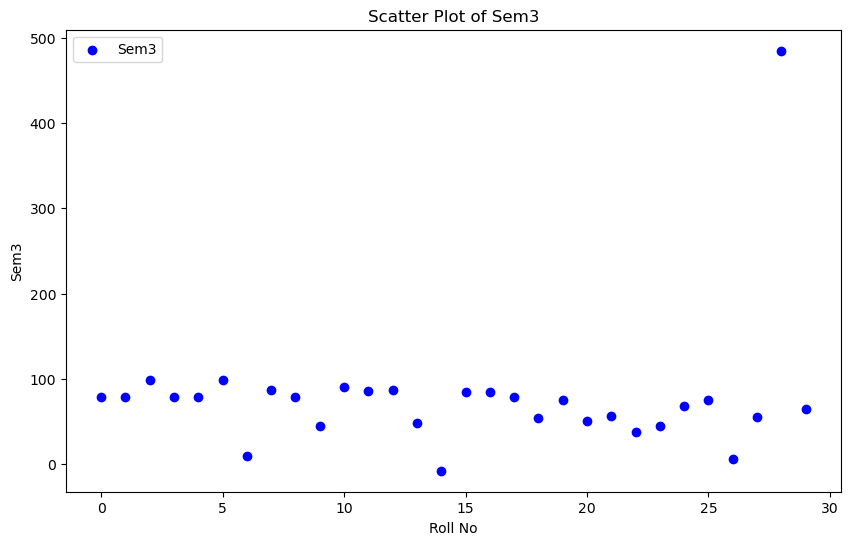

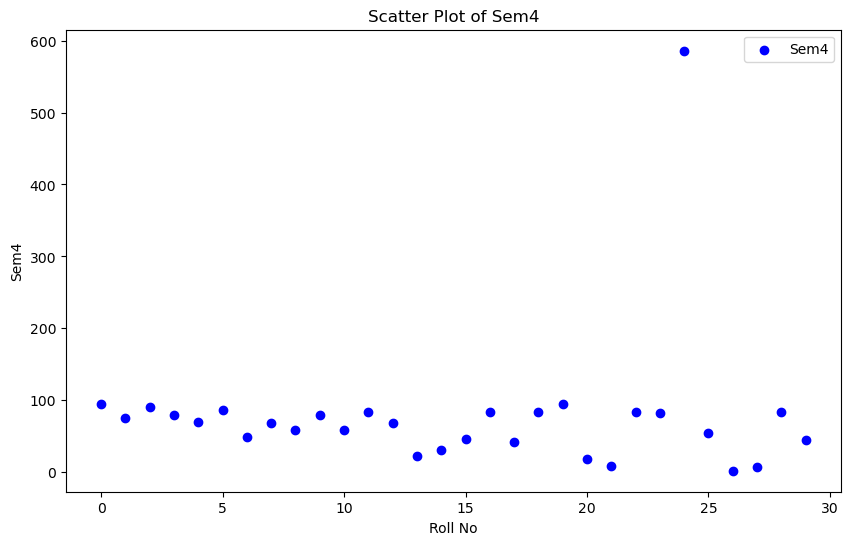

In [17]:
#using scatterplot to plot graph for checking outliers

plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Sem1'], color='blue', label='Sem1')
plt.xlabel('Roll No')
plt.ylabel('Sem1')
plt.title('Scatter Plot of Sem1')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Sem2'], color='blue', label='Sem2')
plt.xlabel('Roll No')
plt.ylabel('Sem2')
plt.title('Scatter Plot of Sem2')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Sem3'], color='blue', label='Sem3')
plt.xlabel('Roll No')
plt.ylabel('Sem3')
plt.title('Scatter Plot of Sem3')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Sem4'], color='blue', label='Sem4')
plt.xlabel('Roll No')
plt.ylabel('Sem4')
plt.title('Scatter Plot of Sem4')
plt.legend()
plt.show()

C:\Users\91862\AppData\Local\Temp\ipykernel_18164\2509907851.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sem1']);


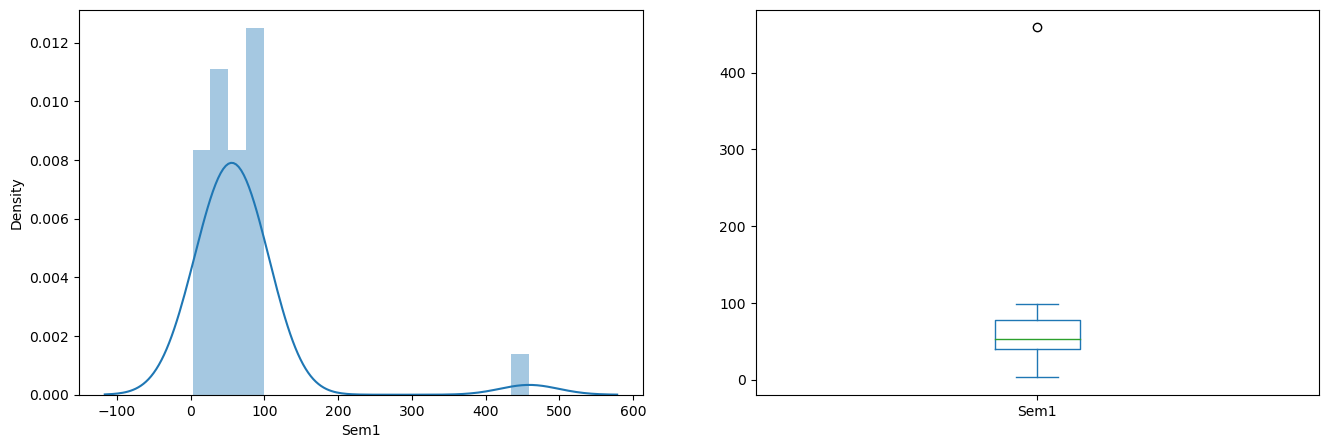

C:\Users\91862\AppData\Local\Temp\ipykernel_18164\2509907851.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sem2']);


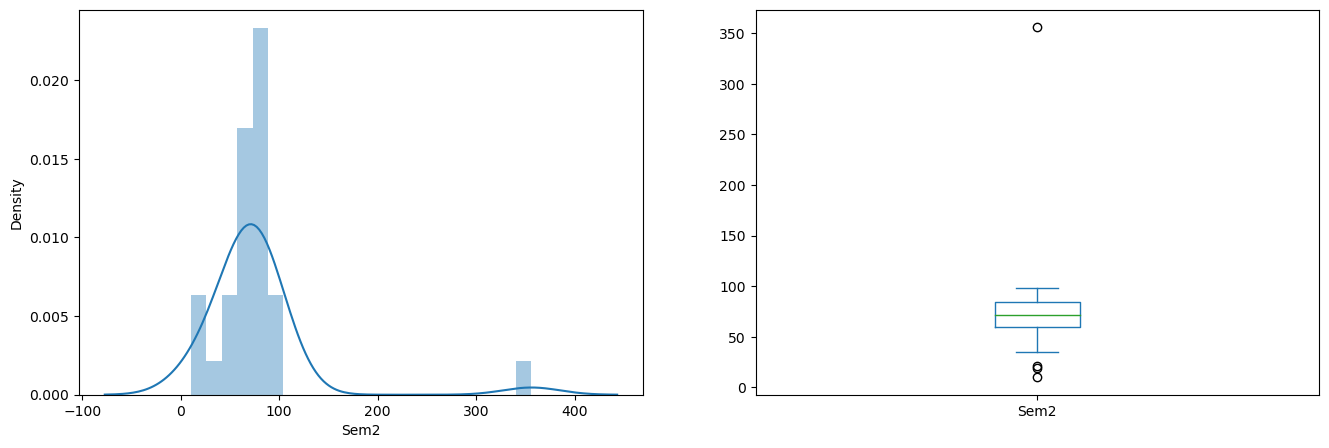

C:\Users\91862\AppData\Local\Temp\ipykernel_18164\2509907851.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sem3']);


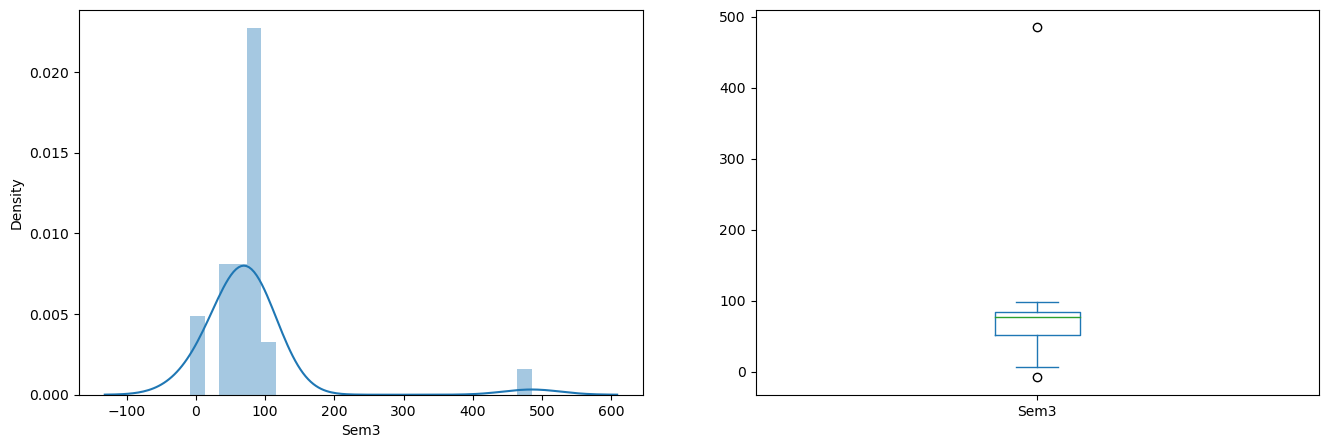

C:\Users\91862\AppData\Local\Temp\ipykernel_18164\2509907851.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sem4']);


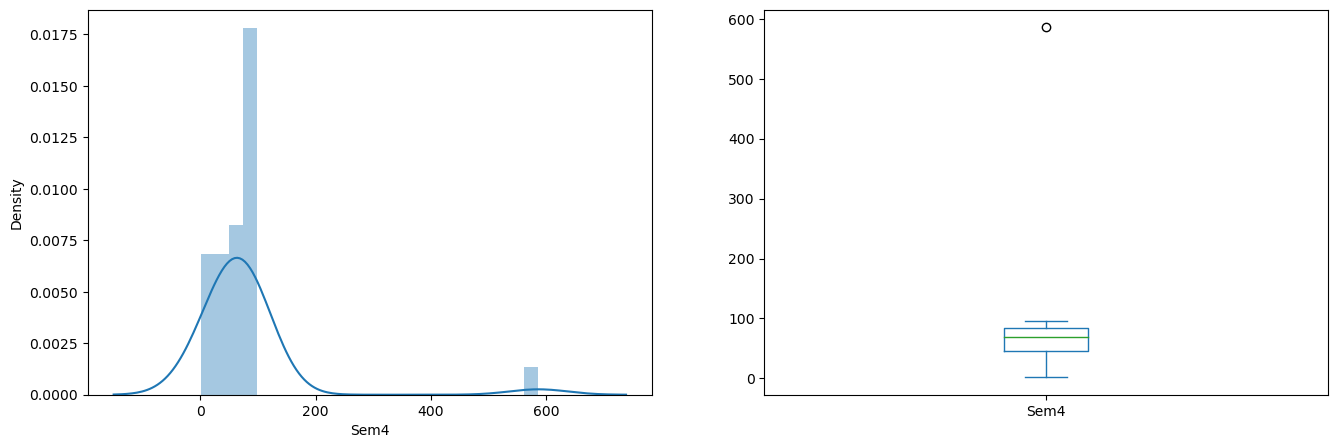

In [18]:
#Alternate method to check outliers by plotting a distplot

plt.subplot(121) 
sns.distplot(df['Sem1']); 
plt.subplot(122) 
df['Sem1'].plot.box(figsize=(16,5)) 
plt.show()

plt.subplot(121) 
sns.distplot(df['Sem2']); 
plt.subplot(122) 
df['Sem2'].plot.box(figsize=(16,5)) 
plt.show()

plt.subplot(121) 
sns.distplot(df['Sem3']); 
plt.subplot(122) 
df['Sem3'].plot.box(figsize=(16,5)) 
plt.show()

plt.subplot(121) 
sns.distplot(df['Sem4']); 
plt.subplot(122) 
df['Sem4'].plot.box(figsize=(16,5)) 
plt.show()

Handling Outliers 

In [19]:
#Using Log Transformatrion to handle the outliers to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.
semester_columns = ['Sem1', 'Sem2', 'Sem3', 'Sem4']
for column in semester_columns:
    df[f'{column}_log_transformed'] = df[column].apply(lambda x: np.log(x) if x > 0 else 0)  # Logarithm transformation
for column in semester_columns:
    print(f"Original '{column}' column:")
    print(df[column].head())
    print(f"\nLog-transformed '{column}' column:")
    print(df[f'{column}_log_transformed'].head())
    print()

Original 'Sem1' column:
0    75.0
1    78.0
2     7.0
3    88.0
4    25.0
Name: Sem1, dtype: float64

Log-transformed 'Sem1' column:
0    4.317488
1    4.356709
2    1.945910
3    4.477337
4    3.218876
Name: Sem1_log_transformed, dtype: float64

Original 'Sem2' column:
0    10.0
1    76.0
2    95.0
3    68.0
4    69.0
Name: Sem2, dtype: float64

Log-transformed 'Sem2' column:
0    2.302585
1    4.330733
2    4.553877
3    4.219508
4    4.234107
Name: Sem2_log_transformed, dtype: float64

Original 'Sem3' column:
0    78.0
1    78.0
2    98.0
3    78.0
4    78.0
Name: Sem3, dtype: float64

Log-transformed 'Sem3' column:
0    4.356709
1    4.356709
2    4.584967
3    4.356709
4    4.356709
Name: Sem3_log_transformed, dtype: float64

Original 'Sem4' column:
0    95.0
1    76.0
2    90.0
3    80.0
4    70.0
Name: Sem4, dtype: float64

Log-transformed 'Sem4' column:
0    4.553877
1    4.330733
2    4.499810
3    4.382027
4    4.248495
Name: Sem4_log_transformed, dtype: float64



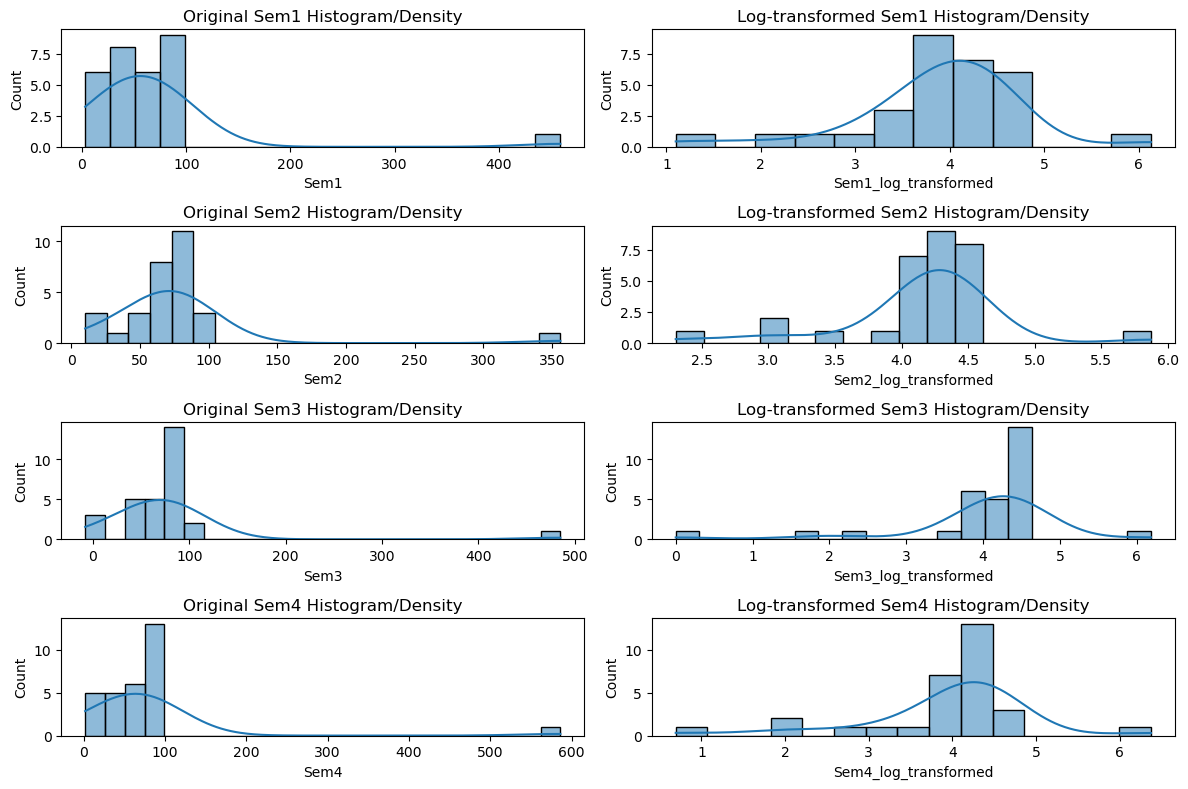

In [20]:
semester_columns = ['Sem1', 'Sem2', 'Sem3', 'Sem4']
fig, axes = plt.subplots(nrows=len(semester_columns), ncols=2, figsize=(12, 8))
for i, column in enumerate(semester_columns):
    sns.histplot(df[column], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f"Original {column} Histogram/Density")
    sns.histplot(df[f'{column}_log_transformed'], ax=axes[i, 1], kde=True)
    axes[i, 1].set_title(f"Log-transformed {column} Histogram/Density")
plt.tight_layout()
plt.show()

In [21]:
df

,Roll No,Name,Gender,Sem1,Sem2,Sem3,Sem4,average Score,Sem1_log_transformed,Sem2_log_transformed,Sem3_log_transformed,Sem4_log_transformed
0,1,Aditya,M,75.0,10.0,78.0,95.0,64.500000,4.317488,2.302585,4.356709,4.553877
1,2,Priti,F,78.0,76.0,78.0,76.0,77.000000,4.356709,4.330733,4.356709,4.330733
2,3,Arjun,M,7.0,95.0,98.0,90.0,72.500000,1.945910,4.553877,4.584967,4.499810
3,4,Bheem,M,88.0,68.0,78.0,80.0,78.500000,4.477337,4.219508,4.356709,4.382027
4,5,Raju,M,25.0,69.0,78.0,70.0,41.000000,3.218876,4.234107,4.356709,4.248495
5,6,Gaurav,M,88.0,67.0,98.0,87.0,85.000000,4.477337,4.204693,4.584967,4.465908
6,7,Gayatri,F,71.0,75.0,9.0,49.0,43.000000,4.262680,4.317488,2.197225,3.891820
7,8,Swar,M,15.0,48.0,87.0,68.0,54.500000,2.708050,3.871201,4.465908,4.219508
8,9,Rupesh,M,35.0,57.0,78.0,59.0,57.250000,3.555348,4.043051,4.356709,4.077537
9,10,Nisha,F,459.0,59.0,45.0,79.0,160.500000,6.129050,4.077537,3.806662,4.369448
